### For the school on chemoinformatics (BIGCHEM project). Munich, 17-21 October, 2016.  
Dr. Pavel Polishchuk

## Basic of RDKit

RDKit is a an open-source cross-platform chemoinformatics toolkit.  
Written in C++, supports Python 2 and 3, Java and C#.  
BSD license  

2000-2006: Developed and used at Rational Discovery for building predictive models for ADME, Tox, biological activity  
June 2006: Open-source (BSD license) release of software, Rational Discovery shuts down  
to present: Open-source development continues, use within Novartis, contributions from Novartis back to open-source version  

Detailed documentation with tutorials and examples are available on http://www.rdkit.org/docs/index.html  
Recently new github repository was created to manage RDKit tutorials: https://github.com/rdkit/rdkit-tutorials  
I highly recommend to subscribe on RDKit maillist https://sourceforge.net/p/rdkit/mailman/rdkit-discuss/

## Reading and writing molecules

RDKit supports various formats: SMILES, Mol, SDF, Mol2, PDB, FASTA, etc.  

In [1]:
from rdkit import Chem

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

### Reading
In the case of successful reading the functions return mol object, otherwise `None`. The latter can be used to check whether reading was successful or not.

#### SMILES  
Coordinates for 2D depiction are generated automatically.

In [3]:
m = Chem.MolFromSmiles("c1ccccc1OC")

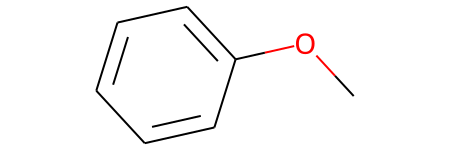

In [4]:
m

Reading of a structure with errors leads to errors, result will be `None`.

In [5]:
m = Chem.MolFromSmiles("c1ccccc1O(C)C")

RDKit ERROR: [12:51:11] Explicit valence for atom # 6 O, 3, is greater than permitted


In [6]:
m is None

True

#### reading from MolBlock  
MolBlock doesn't contain property fields like in SDF file.

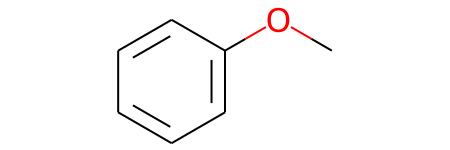

In [7]:
molblock = """
  Mrv1661310131608212D          

 16 16  0  0  0  0            999 V2000
   -5.9598    1.6732    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.6743    1.2607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.6743    0.4357    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9598    0.0232    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2454    0.4357    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2454    1.2607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5309    1.6732    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8164    1.2607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9598    2.4982    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -7.3888    1.6732    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -7.3888    0.0232    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9598   -0.8018    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5309    0.0232    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2289    0.5462    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1019    0.8482    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4039    1.9752    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  4  0  0  0  0
  2  3  4  0  0  0  0
  3  4  4  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
  1  6  4  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  1  9  1  0  0  0  0
  2 10  1  0  0  0  0
  3 11  1  0  0  0  0
  4 12  1  0  0  0  0
  5 13  1  0  0  0  0
  8 14  1  0  0  0  0
  8 15  1  0  0  0  0
  8 16  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

#### Mol files

In [8]:
m = Chem.MolFromMolFile("data/anisole.mol")

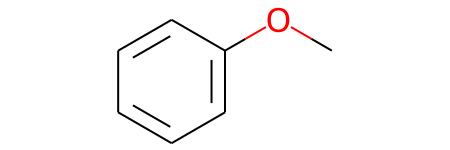

In [9]:
m

#### reading from SDF

In [10]:
iterator = Chem.SDMolSupplier("data/logBB.sdf")
for m in iterator:
    if m is not None:              # test whether molecule was read
        print(m.GetNumAtoms())     # returns number of heavy atoms only, Hs were stripped

5
5
5
5


In [11]:
mols = [m for m in iterator]
len(mols)

4

In the second case if some molecules failed to read there will be some `None`s in the output list which should be removed

In [12]:
mols = [m for m in iterator if m is not None]
len(mols)

4

You may use Supplier as a random-access object:

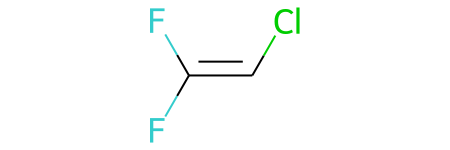

In [13]:
m = iterator[2]
m

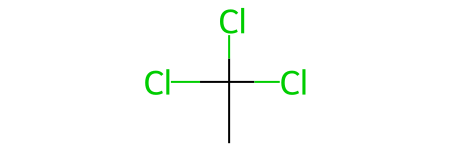

In [14]:
m = iterator[0]
m

#### reading from gzipped SDF and other file-like objects
In this case you cannot use random access.

In [15]:
import gzip
iterator = Chem.ForwardSDMolSupplier(gzip.open("data/logBB.sdf.gz"))
mols = [m for m in iterator if m is not None]
len(mols)

4

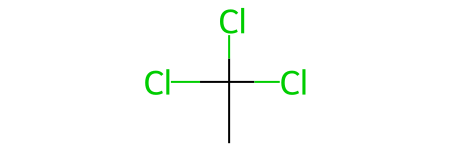

In [16]:
mols[0]

#### Hydrogens

By default hydrogens are removed during reading.

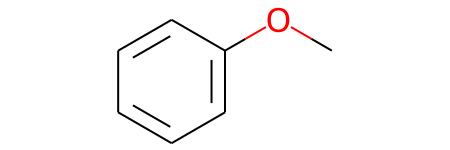

In [17]:
m = Chem.MolFromMolFile("data/anisole.mol")
m

You may add them back manually, however their coordinates will not be recalculated.

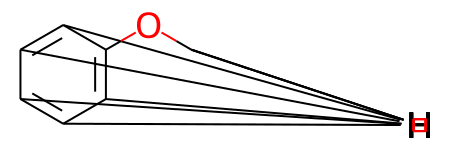

In [18]:
m = Chem.AddHs(m)
m

You may generate 2D coordinates for atoms to a obtain more reasonable depiction

In [19]:
from rdkit.Chem import AllChem

In [20]:
AllChem.Compute2DCoords(m)

0

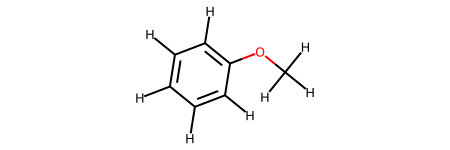

In [21]:
m

To avoid lose of hydrogens add `removeHs = False`, it will keep them during reading.

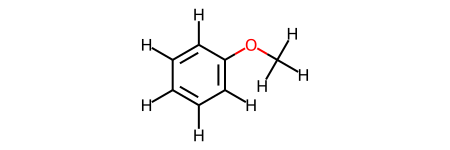

In [22]:
m = Chem.MolFromMolFile("data/anisole.mol", removeHs = False)
m

 This can be particularly important for molecules with chiral centers with attached hydrogens.

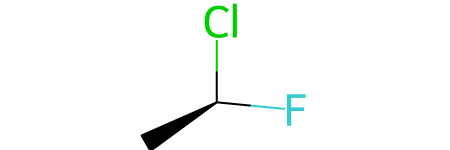

In [23]:
m = Chem.MolFromMolFile("data/chlorofluoroethane.mol")
m

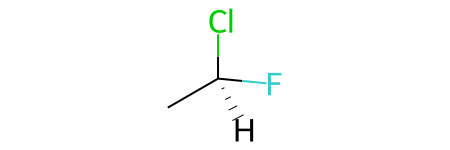

In [24]:
m = Chem.MolFromMolFile("data/chlorofluoroethane.mol", removeHs = False)
m

SMILES reading automatically takes into account chiral hydrogen and preserves them.

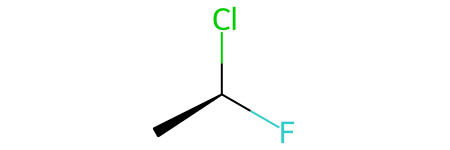

In [25]:
m = Chem.MolFromSmiles("[C@@H](F)(Cl)C")
m

However, explicitly specified Hs will be removed.

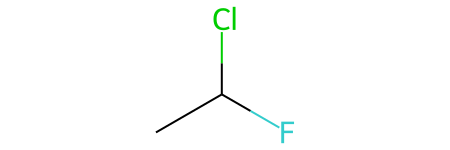

In [26]:
m = Chem.MolFromSmiles("C([H])(F)(Cl)C")
m

### Writing

#### SMILES
By default saving to SMILES provides canonical SMILES but without chirality

In [27]:
m = Chem.MolFromSmiles("[C@@H](F)(Cl)C")
Chem.MolToSmiles(m)

'C[C@H](F)Cl'

In [28]:
Chem.MolToSmiles(m, isomericSmiles = True)

'C[C@H](F)Cl'

#### MolBlock

In [29]:
molblock = Chem.MolToMolBlock(m)
print(molblock)


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  1
M  END



However, chirality was lost. Specifying `includeStereo = True` doesn't help.

In [30]:
molblock = Chem.MolToMolBlock(m, includeStereo = True)
print(molblock)


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  1
M  END



You may note that `MolToMolBlock` produces output with all coordinates identical. Therefore it may be useful to generate them to obtain reasonable 2D depiction. At the same time stereoinformation will appear.

In [31]:
AllChem.Compute2DCoords(m)
molblock = Chem.MolToMolBlock(m)
print(molblock)


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990   -0.7500    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  1
M  END



#### Mol files

You may use Python file objects to write mol files.

In [32]:
print(Chem.MolToMolBlock(m), file=open('data/foo.mol','w+'))

#### SDF

In [33]:
w = Chem.SDWriter('data/foo.sdf')
for m in mols:
    w.write(m)
w.close()

You may use file object and write molecules to gzipped sdf

In [34]:
f = gzip.open('data/foo.sdf.gz', 'a')
w = Chem.SDWriter(f)
for m in mols:
    w.write(m)
w.close()
f.close()

ValueError: Need a text mode file object like StringIO or a file opened with mode 't'

Analogously there is SmilesWriter to create text files containing SMILES representation of molecules

## Structure Sanitization

http://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization  
The molecule parsing functions all, by default, perform a “sanitization” operation on the molecules read. The idea is to generate useful computed properties (like hybridization, ring membership, etc.) for the rest of the code and to ensure that the molecules are “reasonable”: that they can be represented with octet-complete Lewis dot structures.

Here are the steps involved, in order.

1. `clearComputedProps`: removes any computed properties that already exist on the molecule and its atoms and bonds. This step is always performed.

2. `cleanUp`: standardizes a small number of non-standard valence states. The clean up operations are:

   - Neutral 5 valent Ns with double bonds to Os are converted to the zwitterionic form. Example: N(=O)=O -> \[N+\](=O)O-]  
   - Neutral 5 valent Ns with triple bonds to another N are converted to the zwitterionic form. Example: C-N=N#N -> C-N=[N+]=[N-]  
   - Neutral 5 valent phosphorus with one double bond to an O and another to either a C or a P are converted to the zwitterionic form. Example: C=P(=O)O -> C=\[P+\]([O-])O  
   - Neutral Cl, Br, or I with exclusively O neighbors, and a valence of 3, 5, or 7, are converted to the zwitterionic form. This covers things like chlorous acid, chloric acid, and perchloric acid. Example: O=Cl(=O)O -> \[O-\]\[Cl+2\][O-]O  
This step should not generate exceptions.  
    
    
3. `updatePropertyCache`: calculates the explicit and implicit valences on all atoms. This generates exceptions for atoms in higher-than-allowed valence states. This step is always performed, but if it is “skipped” the test for non-standard valences will not be carried out.  

4. `symmetrizeSSSR`: calls the symmetrized smallest set of smallest rings algorithm (discussed in the Getting Started document).  

5. `Kekulize`: converts aromatic rings to their Kekule form. Will raise an exception if a ring cannot be kekulized or if aromatic bonds are found outside of rings.  

6. `assignRadicals`: determines the number of radical electrons (if any) on each atom.  

7. `setAromaticity`: identifies the aromatic rings and ring systems (see above), sets the aromatic flag on atoms and bonds, sets bond orders to aromatic.  

8. `setConjugation`: identifies which bonds are conjugated  

9. `setHybridization`: calculates the hybridization state of each atom  

10. `cleanupChirality`: removes chiral tags from atoms that are not sp3 hybridized.  

11. `adjustHs`: adds explicit Hs where necessary to preserve the chemistry. This is typically needed for heteroatoms in aromatic rings. The classic example is the nitrogen atom in pyrrole.  

The individual steps can be toggled on or off when calling `MolOps::sanitizeMol` or `Chem.SanitizeMol`.

In [35]:
m = Chem.MolFromSmiles('Cn(:o):o')

RDKit ERROR: [12:58:47] non-ring atom 1 marked aromatic


## Working with molecules

### Looping over atoms and bonds

In [36]:
m = Chem.MolFromSmiles('C1OC=C1')

In [37]:
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

6
8
6
6


In [38]:
for bond in m.GetBonds():
    print(bond.GetBondType())

SINGLE
SINGLE
DOUBLE
SINGLE


Individual atoms and bonds can be accesses as well as their properties

In [39]:
m.GetAtomWithIdx(1).GetSymbol()

'O'

In [40]:
m.GetAtomWithIdx(2).GetExplicitValence()

3

In [41]:
m.GetBondWithIdx(0).GetBeginAtomIdx()

0

In [42]:
m.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

You may loop through neigbours of particular atoms

In [43]:
atom = m.GetAtomWithIdx(2)

for nei in atom.GetNeighbors():
    print("root atom %s is connected to %s by %s bond" % (atom.GetSymbol(), nei.GetSymbol(), m.GetBondBetweenAtoms(atom.GetIdx(), nei.GetIdx()).GetBondType()))

root atom C is connected to O by SINGLE bond
root atom C is connected to C by DOUBLE bond


### Molecules properties

You may set and read properties of molecules, which can be stored in property fields of sdf files.

In [44]:
m.SetProp("Activity", "inactive")

In [45]:
m.SetIntProp("Boiling point", 40)

In [46]:
m.GetProp("Boiling point")

'40'

#### Magic properties

There are a lot of 'magic' properties of atoms/bonds and molecules. More details can be found at http://www.rdkit.org/docs/RDKit_Book.html#magic-property-values  
One of them is a title or a name of a molecule ("\_Name")

In [47]:
m.SetProp("_Name", "molecule name")

In [48]:
m.GetProp("_Name")

'molecule name'

When you save this molecule to sdf file, \_Name property will be stored as a title, all others as ordinary property fields.

In [49]:
w = Chem.SDWriter('data/bar.sdf')
w.write(m)
w.close()

## 3D structures and conformers

Generation of 3D structure

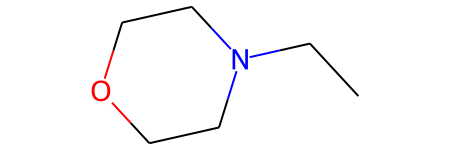

In [50]:
m = Chem.MolFromSmiles('O1CCN(CC)CC1')
m

Since by default RDKit doesn't keep hydrogens they should be added before 3D structure generation to obtain rasonable geometry

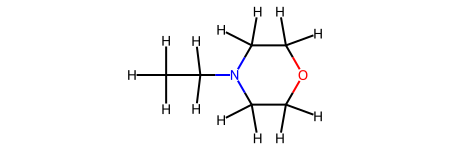

In [51]:
m = Chem.AddHs(m)
m

This command generates 3D structure for a molecule usinf distance matrix approach

In [52]:
AllChem.EmbedMolecule(m)

0

The obtained geometry usually is quite ugly and refinement is neccessary. This can be done by using universal force field (UFF) or Merck molecular force field (MMFF).

In [53]:
AllChem.UFFOptimizeMolecule(m)

0

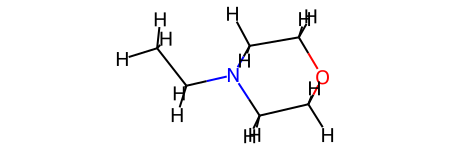

In [54]:
m

In [219]:
AllChem.MMFFOptimizeMolecule(m)

0

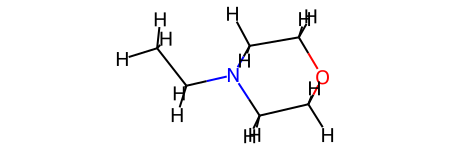

In [55]:
m

#### Generation of multiple conformers

There are a lot of input options. The major ones are the number of conformers and RMS threshold, which will help to discard too similar 3D structures and keep diverse conformers.

In [56]:
cids = AllChem.EmbedMultipleConfs(m, numConfs=10, pruneRmsThresh=1)

In [57]:
len(cids)

1

You may see that from 10 required conformers only 7 were generated. If you will descrese the RMS threshold value more conformers will be kept up to specified maximum value (10).

Generated conformers require geometry optimization to produce more reasonable 3D structures.

In [58]:
for cid in cids:
    AllChem.MMFFOptimizeMolecule(m, confId=cid)

For conformers you may corresponding return energy values. Since we optimized geometry with MMFF we will use the same force field for energy calculation.

In [59]:
for cid in cids:
    ff = AllChem.MMFFGetMoleculeForceField(m, AllChem.MMFFGetMoleculeProperties(m), confId=cid)
    print(ff.CalcEnergy())

56.52251332961608


## Substructure search

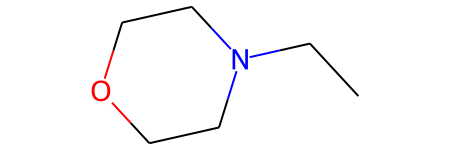

In [60]:
m = Chem.MolFromSmiles('O1CCN(CC)CC1')
m

In [61]:
q = Chem.MolFromSmarts('CCN')

In [62]:
m.HasSubstructMatch(q)

True

In [63]:
m.GetSubstructMatch(q)

(1, 2, 3)

In [64]:
m.GetSubstructMatches(q)

((1, 2, 3), (5, 4, 3), (7, 6, 3))

<font color="red">TASK 1</font>. Write a script to retrive compound names having carboxylic acid group from the sdf file - `logBB_big.sdf`.  
<font color="red">TASK 2</font>. Write a script to retrive compound names having more than one carboxylic acid group.

In [65]:
for m in Chem.SDMolSupplier('data/logBB_big.sdf'):
    if m is not None:
        if m.HasSubstructMatch(Chem.MolFromSmarts('C(=O)[OH]')):
            print(m.GetProp("_Name"))

MolID_208
MolID_215
MolID_280
MolID_281
MolID_317
MolID_172
MolID_71
MolID_41
MolID_180
MolID_118


RDKit ERROR: [13:03:21] non-ring atom 4 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 6561
RDKit ERROR: [13:03:21] ERROR: non-ring atom 4 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 0 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 15523
RDKit ERROR: [13:03:21] ERROR: non-ring atom 0 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 17846
RDKit ERROR: [13:03:21] ERROR: non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 19055
RDKit ERROR: [13:03:21] ERROR: non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 19968


MolID_160
MolID_184
MolID_101
MolID_152
MolID_100


RDKit ERROR: [13:03:21] ERROR: non-ring atom 16 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 18 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 20965
RDKit ERROR: [13:03:21] ERROR: non-ring atom 18 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 20 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 22625
RDKit ERROR: [13:03:21] ERROR: non-ring atom 20 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 18 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 22844
RDKit ERROR: [13:03:21] ERROR: non-ring atom 18 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 19 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 23484
RDKit ERROR: [13:03:21] ERROR: non-ring atom 19 marked aromatic
RDKit ERROR: [13:03:21] non-ring atom 12 marked aromatic
RDKit ERROR: [13:03:21] ERROR: Could not sanitize molecule ending on line 2

## Descriptors calculation

There are a lot of descriptors available in RDKit - http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

In [66]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccncc1C(=O)O')

In [67]:
Descriptors.TPSA(m)

50.19

In [68]:
Descriptors.MolLogP(m)

0.7797999999999998

Charges are computed differently

In [69]:
AllChem.ComputeGasteigerCharges(m)
for a in m.GetAtoms():
    print("atom %s id=%i has %f charge" % (a.GetSymbol(), a.GetIdx(), float(a.GetProp('_GasteigerCharge'))))

atom C id=0 has -0.044587 charge
atom C id=1 has -0.042959 charge
atom C id=2 has 0.026786 charge
atom N id=3 has -0.263835 charge
atom C id=4 has 0.041281 charge
atom C id=5 has 0.077736 charge
atom C id=6 has 0.336759 charge
atom O id=7 has -0.246333 charge
atom O id=8 has -0.477599 charge


## Fingerprints

### Topological fingerprints

They are topological paths between pairs of atoms on a specified distance (defaults: min 1, max 7)

In [70]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [71]:
m1 = Chem.MolFromSmiles("CCCCO")
m2 = Chem.MolFromSmiles("c1ccccc1CO")

In [72]:
fp1 = FingerprintMols.FingerprintMol(m1)
fp2 = FingerprintMols.FingerprintMol(m2)

In [73]:
DataStructs.FingerprintSimilarity(fp1, fp2)

0.14

By default for calculation of similarity Tanimoto is used, but there are some other implemented metrics: Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky

In [74]:
DataStructs.FingerprintSimilarity(fp1,fp2, metric=DataStructs.DiceSimilarity)

0.24561403508771928

### MACCS keys

They are SMARTS patterns of different functiong groups and common fragments: http://rdkit.org/Python_Docs/rdkit.Chem.MACCSkeys-pysrc.html

In [75]:
from rdkit.Chem import MACCSkeys

In [76]:
fp1 = MACCSkeys.GenMACCSKeys(m1)
fp2 = MACCSkeys.GenMACCSKeys(m2)

In [77]:
DataStructs.FingerprintSimilarity(fp1, fp2)

0.3684210526315789

### Morgan fingerprints (Circular Fingerprints)

In [78]:
fp1 = AllChem.GetMorganFingerprint(m1, 2)
fp2 = AllChem.GetMorganFingerprint(m2, 2)

Morgan fingerprints by default are counts, therefore dice similarity should be used as a metric.

In [79]:
DataStructs.DiceSimilarity(fp1, fp2)

0.16666666666666666

But it is possible calculate Morgan fingerprints as bit vectors.

In [80]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, 2)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2, 2)

In [81]:
DataStructs.DiceSimilarity(fp1,fp2)

0.24

In [82]:
DataStructs.FingerprintSimilarity(fp1, fp2)

0.13636363636363635

Atoms can be labeled by feature types (like pharmacophore features): http://www.rdkit.org/docs/GettingStartedInPython.html#feature-definitions-used-in-the-morgan-fingerprints

In [83]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, 2, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2, 2, useFeatures=True)

In [84]:
DataStructs.DiceSimilarity(fp1,fp2)

0.3

In [85]:
DataStructs.FingerprintSimilarity(fp1, fp2)

0.17647058823529413

<font color="red">TASK 3</font>. Write a script to retrive SMILES of the similar compounds from logBB_big.sdf file to the N1CCNCC1c1ccccc1 molecule based on Tanimoto score and topological and Morgan fingerprints.

In [86]:
mol = Chem.MolFromSmiles("N1CCNCC1c1ccccc1")
tp = FingerprintMols.FingerprintMol(mol)
mg = AllChem.GetMorganFingerprintAsBitVect(mol, 2, useFeatures=True)

d = {}
for m in Chem.SDMolSupplier('data/logBB_big.sdf'):
    if m is not None:
        tp_ = FingerprintMols.FingerprintMol(m)
        mg_ = AllChem.GetMorganFingerprintAsBitVect(m, 2, useFeatures=True)
        d[Chem.MolToSmiles(m)] = (DataStructs.FingerprintSimilarity(tp, tp_), DataStructs.FingerprintSimilarity(mg, mg_))

RDKit ERROR: [13:03:22] ERROR: non-ring atom 26 marked aromatic
RDKit ERROR: [13:07:14] non-ring atom 4 marked aromatic
RDKit ERROR: [13:07:14] ERROR: Could not sanitize molecule ending on line 6561
RDKit ERROR: [13:07:14] ERROR: non-ring atom 4 marked aromatic
RDKit ERROR: [13:07:14] non-ring atom 0 marked aromatic
RDKit ERROR: [13:07:14] ERROR: Could not sanitize molecule ending on line 15523
RDKit ERROR: [13:07:14] ERROR: non-ring atom 0 marked aromatic
RDKit ERROR: [13:07:14] non-ring atom 16 marked aromatic
RDKit ERROR: [13:07:14] ERROR: Could not sanitize molecule ending on line 17846
RDKit ERROR: [13:07:14] ERROR: non-ring atom 16 marked aromatic
RDKit ERROR: [13:07:14] non-ring atom 16 marked aromatic
RDKit ERROR: [13:07:14] ERROR: Could not sanitize molecule ending on line 19055
RDKit ERROR: [13:07:14] ERROR: non-ring atom 16 marked aromatic
RDKit ERROR: [13:07:14] non-ring atom 16 marked aromatic
RDKit ERROR: [13:07:14] ERROR: Could not sanitize molecule ending on line 19968


Sort output dictionary by descending order of the topological similarity and return top 5 molecules

In [87]:
sorted(d.items(), key=lambda x: -x[1][0])[:5]

[('CNC(C)Cc1ccccc1', (0.5567567567567567, 0.3333333333333333)),
 ('CCCOC(C)=O', (0.5238095238095238, 0.037037037037037035)),
 ('CC(=O)OC(C)C', (0.5238095238095238, 0.04)),
 ('CC(N)Cc1ccccc1', (0.5054945054945055, 0.30434782608695654)),
 ('FC(F)OC(F)C(F)(F)F', (0.5041322314049587, 0.037037037037037035))]

Do the same with Morgan similarity

In [88]:
sorted(d.items(), key=lambda x: -x[1][1])[:5]

[('CC(C)(C)c1ccccc1', (0.35978835978835977, 0.3684210526315789)),
 ('c1cncc(C2CCCN2)c1', (0.4752186588921283, 0.3448275862068966)),
 ('Cc1ccccc1C', (0.4051724137931034, 0.3333333333333333)),
 ('CNC(C)Cc1ccccc1', (0.5567567567567567, 0.3333333333333333)),
 ('Cc1ccccc1', (0.4603174603174603, 0.3333333333333333))]

### 2D pharmacophore fingerprints

In [89]:
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate

In [90]:
m1 = Chem.MolFromSmiles("NCCCCO")
m2 = Chem.MolFromSmiles("NCCCCCCO")

In [91]:
fp1 = Generate.Gen2DFingerprint(m1, Gobbi_Pharm2D.factory)
fp2 = Generate.Gen2DFingerprint(m2, Gobbi_Pharm2D.factory)

In [92]:
DataStructs.FingerprintSimilarity(fp1, fp2)

0.06153846153846154

## Reactions

Reactions can be constructed based on SMARTS definitions of reactants and products

In [93]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')

In [94]:
p = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'),Chem.MolFromSmiles('NC')))

In [95]:
len(p)

1

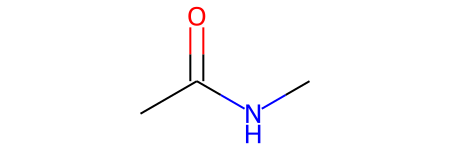

In [96]:
p[0][0]

Generation of combinatorial library

In [262]:
acids = ['c1ccccc1C(=O)O', 'CC(=O)O', 'OC(=O)CC(=O)O']
bases = ['CCN', 'CCNC', 'CNCCN']

a = [Chem.MolFromSmiles(s) for s in acids]
b = [Chem.MolFromSmiles(s) for s in bases]

In [263]:
from itertools import product

p = []
for s in product(a, b):
    p.extend(rxn.RunReactants(s))    

In [264]:
for item in p:
    print(Chem.MolToSmiles(item[0]))

CCNC(=O)c1ccccc1
CCN(C)C(=O)c1ccccc1
CN(CCN)C(=O)c1ccccc1
CNCCNC(=O)c1ccccc1
CCNC(C)=O
CCN(C)C(C)=O
CC(=O)N(C)CCN
CNCCNC(C)=O
CCNC(=O)CC(=O)O
CCNC(=O)CC(=O)O
CCN(C)C(=O)CC(=O)O
CCN(C)C(=O)CC(=O)O
CN(CCN)C(=O)CC(=O)O
CNCCNC(=O)CC(=O)O
CN(CCN)C(=O)CC(=O)O
CNCCNC(=O)CC(=O)O


However, products may contain duplicates, they can be removed based on canonical SMILES of products

In [265]:
set(Chem.MolToSmiles(item[0]) for item in p)

{'CC(=O)N(C)CCN',
 'CCN(C)C(=O)CC(=O)O',
 'CCN(C)C(=O)c1ccccc1',
 'CCN(C)C(C)=O',
 'CCNC(=O)CC(=O)O',
 'CCNC(=O)c1ccccc1',
 'CCNC(C)=O',
 'CN(CCN)C(=O)CC(=O)O',
 'CN(CCN)C(=O)c1ccccc1',
 'CNCCNC(=O)CC(=O)O',
 'CNCCNC(=O)c1ccccc1',
 'CNCCNC(C)=O'}

## Drawing molecules

In [266]:
from rdkit.Chem import Draw

Create a molecule and compute coordinates

In [267]:
m = Chem.MolFromSmiles('CC(=O)O')
AllChem.Compute2DCoords(m)

0

Image can be directly saved to a file or obtaind as PIL image

In [268]:
Draw.MolToFile(m, 'data/mol.png')

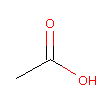

In [269]:
Draw.MolToImage(m, (100, 100))

Multiple molecules can be visualized as a grid. Let's visualize unique products from conbinatorial library generation.

In [270]:
pu = list(set(Chem.MolToSmiles(item[0]) for item in p))
pu

['CCN(C)C(=O)c1ccccc1',
 'CCN(C)C(C)=O',
 'CCNC(=O)CC(=O)O',
 'CC(=O)N(C)CCN',
 'CCNC(C)=O',
 'CN(CCN)C(=O)CC(=O)O',
 'CN(CCN)C(=O)c1ccccc1',
 'CNCCNC(C)=O',
 'CNCCNC(=O)c1ccccc1',
 'CNCCNC(=O)CC(=O)O',
 'CCNC(=O)c1ccccc1',
 'CCN(C)C(=O)CC(=O)O']

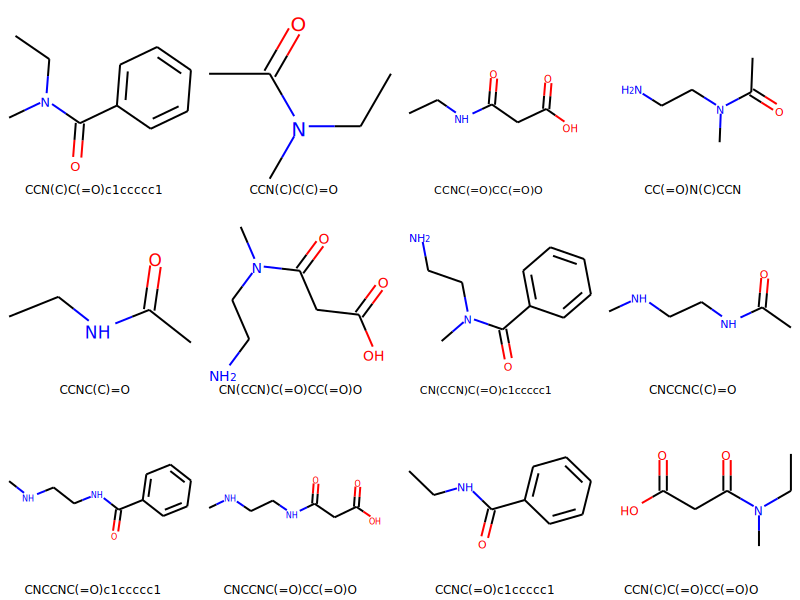

In [271]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in pu], molsPerRow=4, subImgSize=(200,200), legends=pu)

---

Recommended sources:

1. RDKit official web-site: http://www.rdkit.org/docs/index.html
2. RDKit maillists: https://sourceforge.net/p/rdkit/mailman/rdkit-discuss/